In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv('Housing Price Predition.csv')

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     509 non-null    float64
 1   ZN       509 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     509 non-null    int64  
 4   NOX      507 non-null    float64
 5   RM       509 non-null    float64
 6   AGE      508 non-null    float64
 7   DIS      509 non-null    float64
 8   RAD      508 non-null    float64
 9   TAX      509 non-null    int64  
 10  PTRATIO  509 non-null    float64
 11  B        509 non-null    float64
 12  LSTAT    508 non-null    float64
 13  MEDV     509 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.8 KB


In [5]:
housing['CHAS']

0      0
1      0
2      0
3      0
4      0
      ..
504    0
505    0
506    0
507    0
508    0
Name: CHAS, Length: 509, dtype: int64

In [6]:
housing['CHAS'].value_counts()

0    474
1     35
Name: CHAS, dtype: int64

In [7]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,509.000000,509.000000,506.000000,509.000000,507.000000,509.000000,508.000000,509.000000,508.000000,509.000000,509.000000,509.000000,508.000000,509.000000
mean,3.707516,11.296660,11.198281,0.068762,0.555216,6.279845,68.579134,3.787705,9.610236,409.216110,18.463851,356.664892,12.705276,22.501572
std,8.732089,23.269781,6.856713,0.253298,0.115633,0.703449,28.114744,2.101852,8.735069,168.814161,2.161553,91.562469,7.131979,9.183497
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.880000,45.075000,2.100700,4.000000,279.000000,17.400000,375.330000,7.092500,17.000000
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.202000,77.150000,3.182700,5.000000,330.000000,19.100000,391.450000,11.430000,21.200000
75%,3.693110,12.500000,18.100000,0.000000,0.624000,6.619000,94.100000,5.118000,24.000000,666.000000,20.200000,396.240000,16.992500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

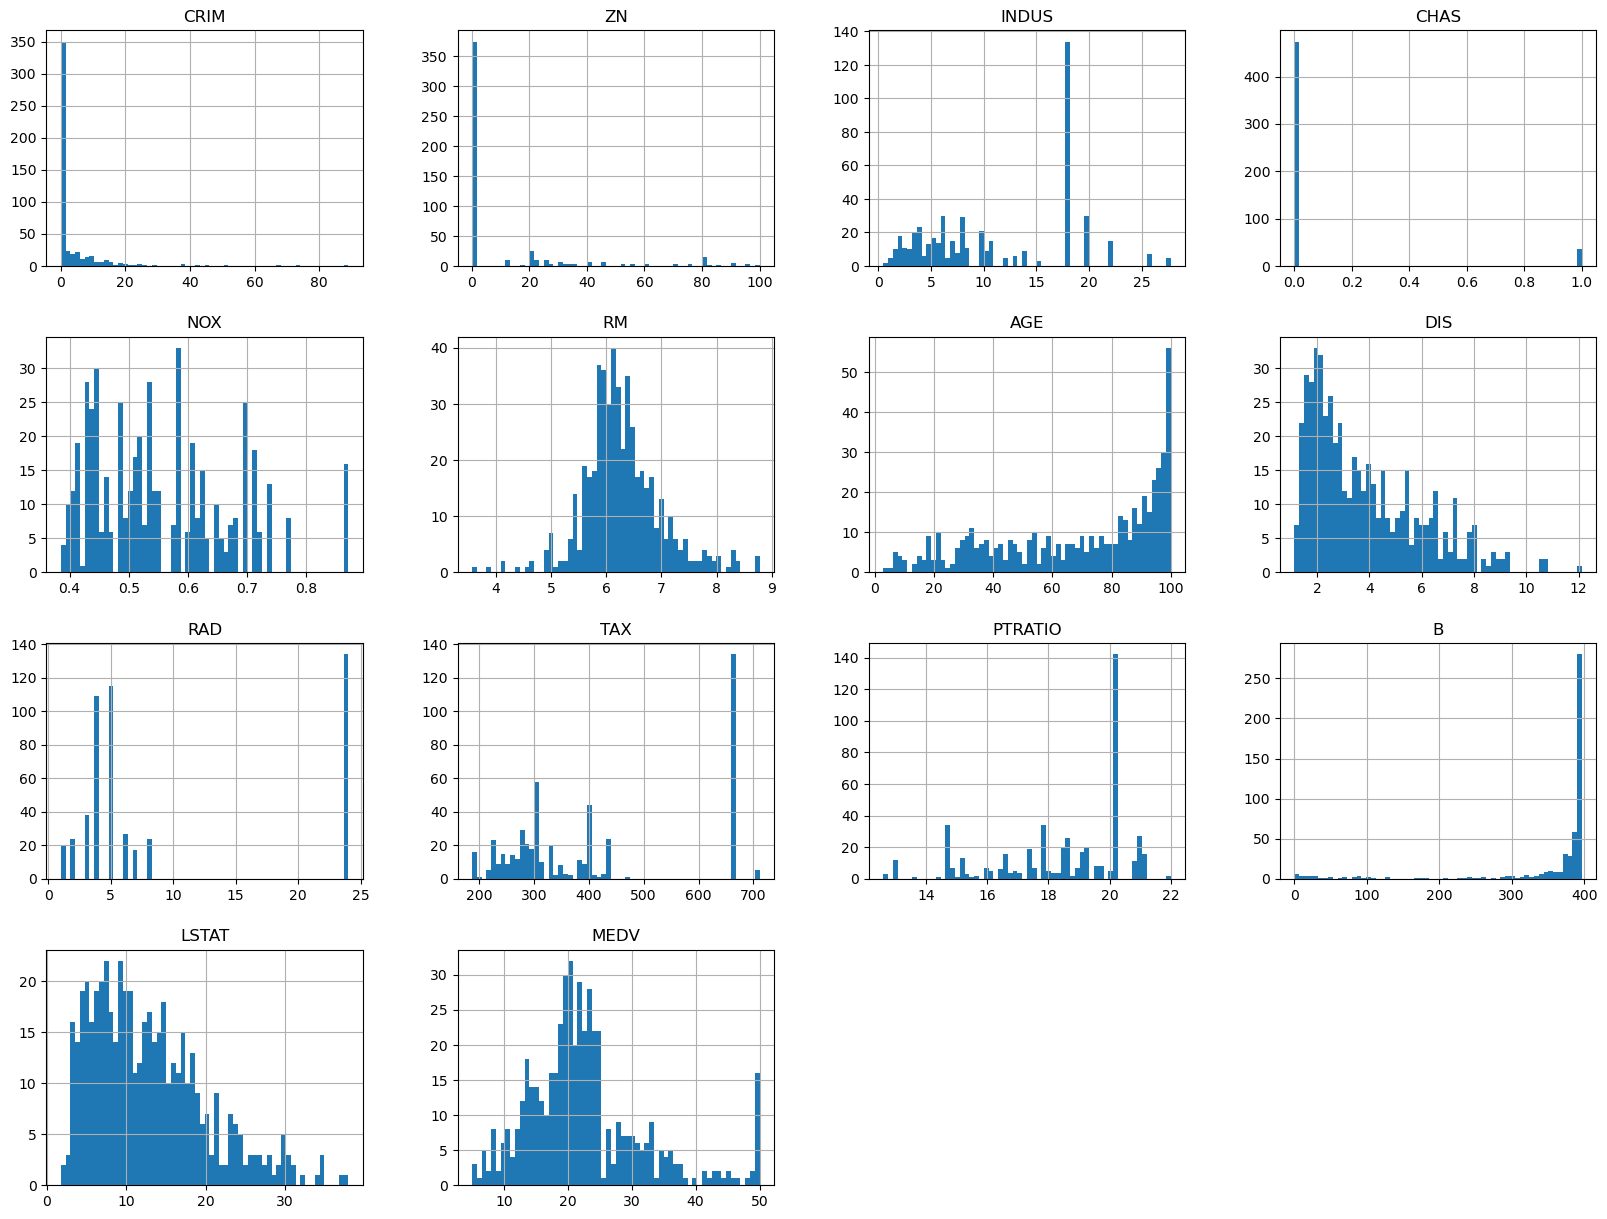

In [10]:
housing.hist(bins=60, figsize= (20,15))

## Train-Test Split

In [11]:
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [12]:
train_set, test_set = split_train_test(housing, 0.2)

[ 79 317 486 397 167 494  63 185  84 124  73 284 131  68  70 473 247  30
   9  55 322 407 314 420 172 377 483 268 140 229 450 180  72 275 231 208
 321 436 153 451 234 424   2 338 301 416 325 368 250 117  76 492 211 104
  33  78  82 470 291   0 209  11 228 448  22 452  77  93 503 504 132  18
 440 154 411  90  39 477  46 395 194 357 278 280 181 272 340 176  69 495
 297 417 101 488 204 299 334 500 192 447 182 398 506 137 422 329 412 439
 352  86  75 446  15 274 467 392  19 373 404  56 462 499 237 336 384 346
 507 148  25 255  42 393 195 281 126 331  31 113 353 210 487  57 460  24
  17 249  66 248 155  94 245 433  23 318 444 324   5 116  45 349  16 471
 362   3 361 421  60 110 323 266  29 481 173  26   7 461 108  37 157 475
 118 114 175 265 415 144 375 386 203 222 225 453 141 371  67 218 168 502
 382 220 193 271 109 358 145  92 152 227 238  83 253 165 163 199 341  74
 476 244 478 119 320 484 262 364 406 305 423 332 426 277  36 196 139 370
 474 381 289  59 111  89 296   6 403 414 388 158 15

In [13]:
print(f"Rows in train set: {len(train_set)}\nRows in test set:{len(test_set)}\n")

Rows in train set: 408
Rows in test set:101



In [14]:
from sklearn.model_selection import train_test_split
train_set, test_set =train_test_split(housing, test_size= 0.2, random_state= 42)
print(f"Rows in train set: {len(train_set)}\nRows in test set:{len(test_set)}\n")

Rows in train set: 407
Rows in test set:102



In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size= 0.2, random_state= 42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    

In [16]:
strat_test_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
342,0.02498,0.0,1.89,0,0.518,6.540,59.7,6.2669,1.0,422,15.9,389.96,8.65,16.5
379,17.86670,0.0,18.10,0,0.671,6.223,100.0,1.3861,24.0,666,20.2,393.74,21.78,10.2
223,0.61470,0.0,6.20,0,0.507,6.618,80.8,3.2721,8.0,307,17.4,396.90,7.60,30.1
221,0.40771,0.0,6.20,1,0.507,6.164,91.3,3.0480,8.0,307,17.4,395.24,21.46,21.7
48,0.25387,0.0,6.91,0,0.448,5.399,95.3,5.8700,3.0,233,17.9,396.90,30.81,14.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.05660,0.0,3.41,0,0.489,7.007,86.3,3.4217,2.0,270,17.8,396.90,5.50,23.6
469,13.07510,0.0,18.10,0,0.580,5.713,56.7,2.8237,24.0,666,20.2,396.90,14.76,20.1
52,0.05360,21.0,5.64,0,0.439,6.511,21.1,6.8147,4.0,243,16.8,396.90,5.28,25.0
121,0.07165,0.0,25.65,0,0.581,6.004,84.1,2.1974,2.0,188,19.1,377.67,14.27,20.3


In [17]:
strat_test_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,4.056773,13.254902,10.692941,0.068627,0.542010,6.281029,68.184314,3.935725,8.803922,399.901961,18.408824,369.728235,12.332157,22.598039
std,10.601769,27.527371,7.173990,0.254068,0.110714,0.674738,27.693480,2.162961,8.617320,172.738543,2.321535,68.977741,7.115594,8.880415
min,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,6.500000,1.137000,1.000000,188.000000,12.600000,3.650000,2.470000,5.000000
25%,0.057827,0.000000,4.950000,0.000000,0.448000,5.890500,46.525000,2.126600,4.000000,270.750000,16.800000,377.685000,7.480000,18.625000
50%,0.169400,0.000000,8.140000,0.000000,0.516500,6.154500,73.600000,3.347500,5.000000,307.000000,19.200000,393.895000,10.305000,21.150000
75%,2.061955,0.000000,18.100000,0.000000,0.609000,6.546750,94.400000,5.609225,8.000000,666.000000,20.200000,396.900000,16.440000,25.000000
max,88.976200,90.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.585700,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [18]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 342 to 356
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     102 non-null    float64
 1   ZN       102 non-null    float64
 2   INDUS    102 non-null    float64
 3   CHAS     102 non-null    int64  
 4   NOX      102 non-null    float64
 5   RM       102 non-null    float64
 6   AGE      102 non-null    float64
 7   DIS      102 non-null    float64
 8   RAD      102 non-null    float64
 9   TAX      102 non-null    int64  
 10  PTRATIO  102 non-null    float64
 11  B        102 non-null    float64
 12  LSTAT    102 non-null    float64
 13  MEDV     102 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 12.0 KB


In [19]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [20]:
strat_train_set['CHAS'].value_counts()

0    379
1     28
Name: CHAS, dtype: int64

In [21]:
#95/7

In [22]:
#379/28

In [61]:
housing= strat_train_set.copy()

## Looking for Correlation

In [23]:
corr_matrix = housing.corr()

In [24]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695750
ZN         0.361314
B          0.332876
DIS        0.251720
CHAS       0.175888
AGE       -0.377796
RAD       -0.383389
CRIM      -0.392711
NOX       -0.428594
TAX       -0.469888
INDUS     -0.487283
PTRATIO   -0.508786
LSTAT     -0.735700
Name: MEDV, dtype: float64

In [25]:
## MEDV= 1 = strong positive correlation 

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

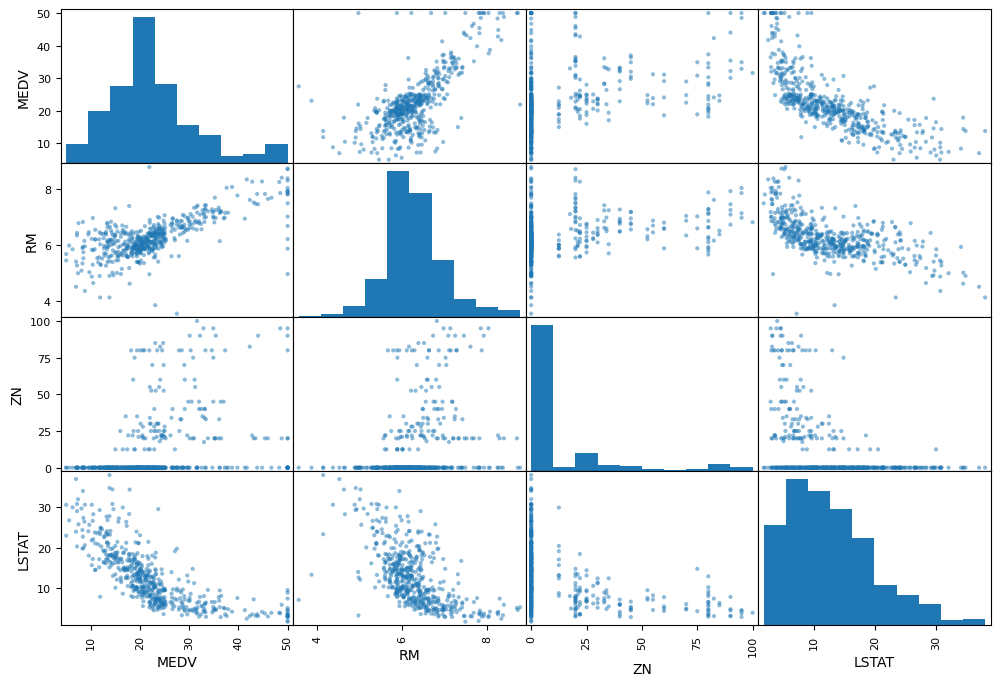

In [26]:
from pandas.plotting import scatter_matrix
attributes = ['MEDV', 'RM', 'ZN', 'LSTAT']
scatter_matrix(housing[attributes], figsize= (12,8))

<Axes: xlabel='RM', ylabel='MEDV'>

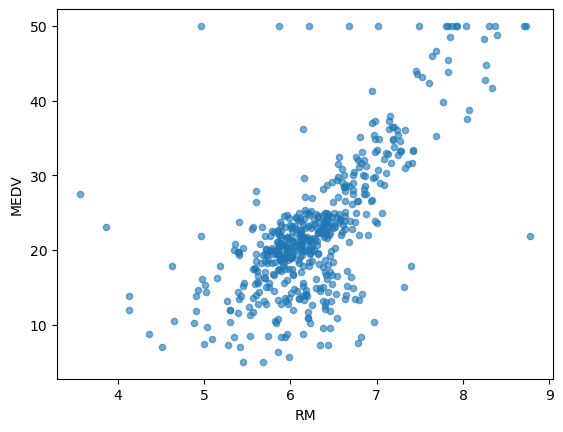

In [27]:
housing.plot(kind='scatter', x='RM', y= 'MEDV', alpha= 0.6)

## Trying out Attribute Combinations

In [28]:
housing['TAXRM']= housing['TAX']/housing['RM']

In [29]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296,15.3,396.90,4.98,24.0,45.019011
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242,17.8,396.90,9.14,21.6,37.688834
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242,17.8,392.83,4.03,34.7,33.681280
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222,18.7,394.63,2.94,33.4,31.723350
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222,18.7,396.90,5.33,36.2,31.061984


In [30]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695750
ZN         0.361314
B          0.332876
DIS        0.251720
CHAS       0.175888
AGE       -0.377796
RAD       -0.383389
CRIM      -0.392711
NOX       -0.428594
TAX       -0.469888
INDUS     -0.487283
PTRATIO   -0.508786
TAXRM     -0.538824
LSTAT     -0.735700
Name: MEDV, dtype: float64

<Axes: xlabel='TAXRM', ylabel='MEDV'>

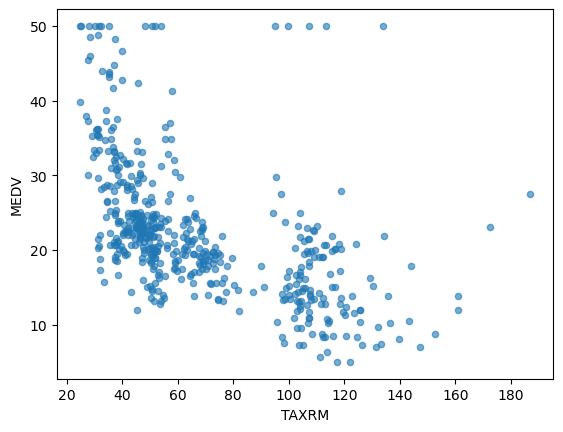

In [31]:
housing.plot(kind='scatter', x='TAXRM', y= 'MEDV', alpha= 0.6)

## Missing Attributes

In [33]:
#To take care of missing attributes, you have three options:
#    1. Get rid of the missing data points.
#    2. Get rid of the whole attribute.
#    3. Set the value to some value(0, mean or median).

In [41]:
a= housing.dropna(subset=["RM"])      ## option 1.
a.shape

(509, 15)

In [37]:
housing.drop("RM", axis= 1)         ## option 2.
## Note that there is no RM column and theoriginal housing dataframe will remain unchanged.

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
0,0.00632,18.0,2.31,0,0.538,65.2,4.0900,1.0,296,15.3,396.90,4.98,24.0,45.019011
1,0.02731,0.0,7.07,0,0.469,78.9,4.9671,2.0,242,17.8,396.90,9.14,21.6,37.688834
2,0.02729,0.0,7.07,0,0.469,61.1,4.9671,2.0,242,17.8,392.83,4.03,34.7,33.681280
3,0.03237,0.0,2.18,0,0.458,45.8,6.0622,3.0,222,18.7,394.63,2.94,33.4,31.723350
4,0.06905,0.0,2.18,0,0.458,54.2,6.0622,3.0,222,18.7,396.90,5.33,36.2,31.061984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,0.06263,0.0,11.93,0,0.573,69.1,2.4786,1.0,273,21.0,391.99,9.67,22.4,41.407553
505,0.04527,0.0,11.93,0,0.573,76.7,2.2875,1.0,273,21.0,396.90,9.08,20.6,44.607843
506,0.06076,0.0,11.93,0,0.573,91.0,2.1675,1.0,273,21.0,396.90,5.64,23.9,39.134174
507,0.10959,0.0,11.93,0,0.573,89.3,2.3889,1.0,273,21.0,393.45,6.48,22.0,40.182514


In [42]:
median = housing["RM"].median()

In [43]:
median

6.202

In [44]:
housing["RM"].fillna(median)         ##compute median for option 3.
#Note that the original housing dataframe will remain unchanged.

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
504    6.593
505    6.120
506    6.976
507    6.794
508    6.030
Name: RM, Length: 509, dtype: float64

In [45]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296,15.3,396.90,4.98,24.0,45.019011
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242,17.8,396.90,9.14,21.6,37.688834
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242,17.8,392.83,4.03,34.7,33.681280
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222,18.7,394.63,2.94,33.4,31.723350
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222,18.7,396.90,5.33,36.2,31.061984


In [46]:
housing.shape

(509, 15)

In [50]:
from sklearn.impute import SimpleImputer
imputer=  SimpleImputer(strategy= "median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [53]:
imputer.statistics_

array([2.61690000e-01, 0.00000000e+00, 9.69000000e+00, 0.00000000e+00,
       5.38000000e-01, 6.20200000e+00, 7.71500000e+01, 3.18270000e+00,
       5.00000000e+00, 3.30000000e+02, 1.91000000e+01, 3.91450000e+02,
       1.14300000e+01, 2.12000000e+01, 5.36078965e+01])

In [52]:
imputer.statistics_.shape

(15,)

In [54]:
X = imputer.transform(housing)

In [56]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [58]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.00000,509.000000,509.000000
mean,3.707516,11.296660,11.189391,0.068762,0.555149,6.279845,68.595972,3.787705,9.601179,409.216110,18.463851,356.664892,12.70277,22.501572,66.967149
std,8.732089,23.269781,6.837413,0.253298,0.115410,0.703449,28.089627,2.101852,8.728860,168.814161,2.161553,91.562469,7.12518,9.183497,31.445811
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.73000,5.000000,24.645639
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.880000,45.100000,2.100700,4.000000,279.000000,17.400000,375.330000,7.12000,17.000000,43.787543
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.202000,77.150000,3.182700,5.000000,330.000000,19.100000,391.450000,11.43000,21.200000,53.607897
75%,3.693110,12.500000,18.100000,0.000000,0.624000,6.619000,94.100000,5.118000,24.000000,666.000000,20.200000,396.240000,16.96000,25.000000,98.201121
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.97000,50.000000,187.026116
